In [1]:
import numpy as np 
from paper_plots import plot_hp_convergence
import matplotlib.pyplot as plt 

In [2]:
data = np.load('fundamental_outside8.npz')
errors = data["errors"]
hs = data["hs"]
N_ps = data["N_ths"]
kappa_e  = 8

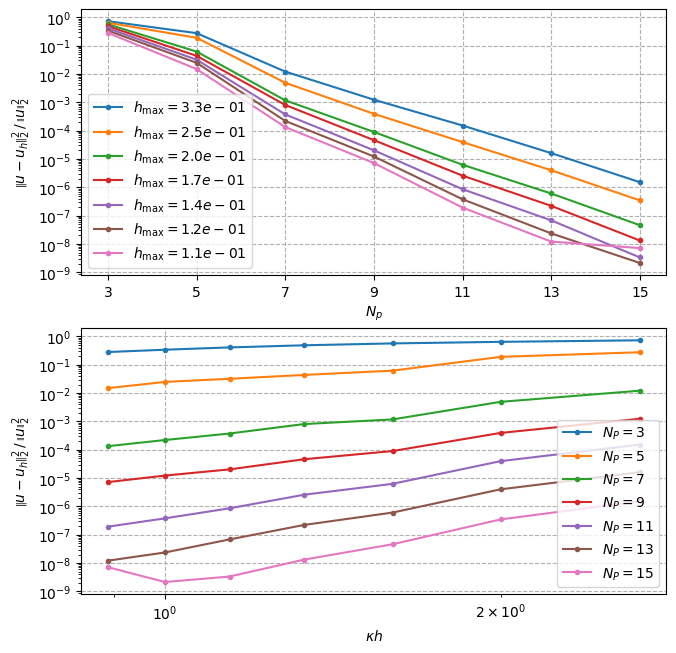

In [3]:

plot_hp_convergence(errors,hs,N_ps,kappa_e,N_modes=15,H=1)

Text(1.0, 0.001, '$y\\propto(\\kappa h)^{\\frac{3}{2}}$')

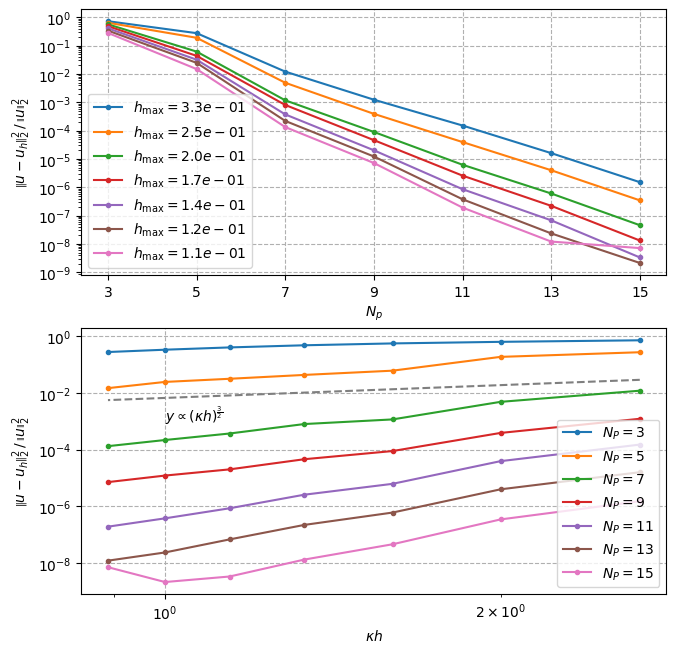

In [4]:
from matplotlib import ticker as mticker

import numpy as np


inches_per_dot = 1/72.27
cm2inch = 1/2.54 # inch per cm
columnwidth = 630.185 * inches_per_dot
columnwidth = 469.75502 * inches_per_dot
#columnwidth = 524.07272*inches_per_dot

columnwidth=columnwidth*0.9

left_margin = 3. * cm2inch # cm
right_margin = 1.*cm2inch  # cm
figure_width = columnwidth # cm
figure_height = columnwidth/1. # cm
top_margin = 2.*cm2inch    # cm
bottom_margin = 1.5*cm2inch # cm

box_width = left_margin + figure_width + right_margin   # cm
box_height = top_margin + figure_height + bottom_margin # cm

fig, ax = plt.subplots(nrows=2,figsize=(box_width,box_height))

for err, h in zip(errors,hs):
    ax[0].semilogy(N_ps,err,'.-', label=f'$h_\\mathrm{{max}} = {h: .1e}$')

ax[0].set_xlabel('$N_p$')
ax[0].set_ylabel('$\\left\\Vert u - u_h\\right\\Vert_2^2 \\, / \\, \\left\\Vert u \\right\\Vert_2^2$')
ax[0].yaxis.set_major_locator(mticker.LogLocator(numticks=999))
ax[0].yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))
ax[0].set_xticks(range(3,17,2))
ax[0].grid(True,which="major",ls='--')
ax[0].legend()


for err, N_th in zip(errors.transpose(),N_ps):
    ax[1].loglog(kappa_e*hs,err,'.-', label=f'$N_P = {N_th}$')

ax[1].set_xlabel('$\\kappa h$')
ax[1].set_ylabel('$\\left\\Vert u - u_h\\right\\Vert_2^2 \\, / \\, \\left\\Vert u \\right\\Vert_2^2$')
ax[1].legend(loc="lower right")
ax[1].yaxis.set_major_locator(mticker.LogLocator(numticks=999))
ax[1].yaxis.set_minor_locator(mticker.LogLocator(numticks=999, subs="auto"))

plt.grid(True,which="major",ls='--')


fig.subplots_adjust(left   = left_margin / box_width,
                    bottom = bottom_margin / box_height,
                    right  = 1. - right_margin / box_width,
                    top    = 1. - top_margin   / box_height)

plt.loglog(kappa_e*hs, np.e**(-5)*(kappa_e*hs)**(1.5),'--')
plt.text(x=1., y=0.001, s=r'$y\propto(\kappa h)^{\frac{3}{2}}$')



# plt.loglog(kappa_e*hs, np.e**(-7)*(kappa_e*hs)**(4.15),'--')
# plt.text(x=1., y=0.004, s=r'$y\propto(\kappa h)^{4.15}$')

# plt.loglog(kappa_e*hs, np.e**(-19)*(kappa_e*hs)**(6.7),'--')
# plt.text(x=1.5, y=1E-8, s=r'$y\propto(\kappa h)^{6.7}$')

#plt.savefig('with_1.5_line.pdf')

In [5]:
from scipy.stats import linregress

results = linregress(np.log(kappa_e*hs),np.log(errors[:,2]))
results

LinregressResult(slope=np.float64(4.158075283080739), intercept=np.float64(-8.42940068812029), rvalue=np.float64(0.995572852547606), pvalue=np.float64(2.498808752966444e-06), stderr=np.float64(0.1755618252368403), intercept_stderr=np.float64(0.0884765636669529))

$$
\log(\mathrm{err})\approx  -8.5 + 4.15*\log(\kappa h)
$$

$$
\mathrm{err}\approx  e^{-8.5}\left(\kappa h\right)^{4.15}
$$

In [6]:
np.e**(-8.5)

0.00020346836901064428

In [7]:
results = linregress(np.log(kappa_e*hs),np.log(errors[:,5]))
results


LinregressResult(slope=np.float64(6.7360638357417235), intercept=np.float64(-17.407404066113962), rvalue=np.float64(0.9975759422001309), pvalue=np.float64(5.549413143512277e-07), stderr=np.float64(0.21013498337751546), intercept_stderr=np.float64(0.10590013637858582))

In [8]:
results = linregress(np.log(kappa_e*hs),np.log(errors[:,0]))
results


LinregressResult(slope=np.float64(0.8558593615346638), intercept=np.float64(-1.0570503835768967), rvalue=np.float64(0.9711002957076171), pvalue=np.float64(0.00026849130851610116), stderr=np.float64(0.09407070047824433), intercept_stderr=np.float64(0.04740809859335931))

In [9]:
results = linregress(np.log(kappa_e*hs),np.log(errors[:,1]))
results


LinregressResult(slope=np.float64(2.6865325268348257), intercept=np.float64(-3.827688868572153), rvalue=np.float64(0.9871177109580159), pvalue=np.float64(3.592796897542361e-05), stderr=np.float64(0.19473610243503953), intercept_stderr=np.float64(0.09813967895414966))

In [10]:
from exact_solutions import GreenFunctionModes
from domains import Waveguide, ScattererShape, ScattererType
from Trefft_tools import TrefftzFunction, TrefftzSpace, Assemble_blockMatrix, AssembleGreenRHS_left

from scipy.sparse.linalg import spsolve as solve

working on refinement: N=3
h_max=np.float64(0.4580471101557189)
Initial refinement:
N_theta=3...
N_theta=5...
N_theta=7...
N_theta=9...
N_theta=11...
N_theta=13...
N_theta=15...
working on refinement: N=4
h_max=np.float64(0.36199298260050544)
N_theta=3...
N_theta=5...
N_theta=7...
N_theta=9...
N_theta=11...
N_theta=13...
N_theta=15...
working on refinement: N=5
h_max=np.float64(0.28998965946483024)
N_theta=3...
N_theta=5...
N_theta=7...
N_theta=9...
N_theta=11...
N_theta=13...
N_theta=15...
working on refinement: N=6
h_max=np.float64(0.24691193897502972)
N_theta=3...
N_theta=5...
N_theta=7...
N_theta=9...
N_theta=11...
N_theta=13...
N_theta=15...
working on refinement: N=7
h_max=np.float64(0.2052507504617864)
N_theta=3...
N_theta=5...
N_theta=7...
N_theta=9...
N_theta=11...
N_theta=13...
N_theta=15...
working on refinement: N=8
h_max=np.float64(0.1773973634113433)
N_theta=3...
N_theta=5...
N_theta=7...
N_theta=9...
N_theta=11...
N_theta=13...
N_theta=15...
working on refinement: N=9
h_

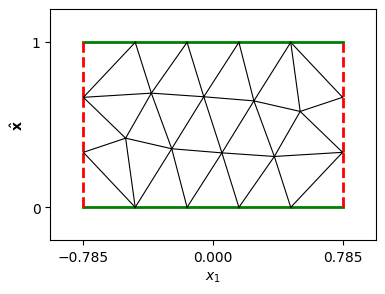

In [33]:
refinements = range(3,10,1)
N_ths = [3,5,7,9,11,13,15]


N_ref = len(refinements)
N_N_th = len(N_ths)

hs = np.zeros((N_ref), dtype=np.float64)
Hs = np.zeros((N_ref), dtype=np.float64)

conds = np.zeros((N_ref,N_N_th), dtype=np.float64)
errors = np.zeros((N_ref,N_N_th), dtype=np.float64)

factor = 8/8

kappa_e = factor*8.
lambda_e = 2*np.pi/kappa_e
R = factor*lambda_e
H = 1.


c = (-1.5*R,0.3*H)

#t=1

Ny = 100
Nx = int(R/H*Ny)

x = np.linspace(-R,R,Nx)
y = np.linspace(0,H,Ny)
X, Y = np.meshgrid(x,y)

M = 32
u_exact = np.reshape( GreenFunctionModes(kappa_e, H, np.stack([X.ravel(),Y.ravel()], axis=1), c[0], c[1], M=M), (Ny,Nx))


for (i,N) in enumerate(refinements):
    print(f"working on refinement: {N=}")
    h = H/N
    hs[i] = h
   
    Domain = Waveguide(R=R,H=H) 
    #Domain.add_scatterer( ScattererShape.RECTANGLE, ScattererType.SOUND_SOFT, (c, np.sqrt(2)*0.1*H, np.sqrt(2)*0.1*H))
    Domain.generate_mesh(h_max=h)

    side_ls = np.array([E.l for E in Domain.Edges])
    h_max = np.max(side_ls)
    Hs[i] = h_max
    print(f'{h_max=}')

    if i == 0:
        print('Initial refinement:')
        Domain.plot_mesh()

    for (j,Nth) in enumerate(N_ths):
        print(f"N_theta={Nth}...")
        th_0 = np.e/np.pi # no correct direction in the basis
        #th_0 = 0
        V = TrefftzSpace(Domain, Nth, {"Omega_i" : kappa_e , "Omega_e" : kappa_e}, th_0 )
        N_modes = 15 #Number of modes for the DtN map
        # "UWVF" parameters
        a = 0.5
        b = 0.5
        d_1 = 0.5
        d_2 = 0.5

        A = Assemble_blockMatrix( V=V, Edges=Domain.Edges, H=H, k=kappa_e, N_p = Nth, th_0=th_0, a=1/2, b=1/2, d_1=1/2, d_2=1/2, N_DtN=N_modes)
        # _, _, conds[i,j] = cond(A)
        B = AssembleGreenRHS_left(V = V, Edges=Domain.Edges, k=kappa_e, H=H, d_2=1/2, x_0 = c[0], y_0 = c[1], M = M)

        A = A.tocsc()
        
        DOFs = solve(A,B)
        f = TrefftzFunction(V,DOFs)

        u_Trefft =  np.reshape([ f(x_, y_) for x_, y_ in zip( X.ravel(), Y.ravel()) ], [Ny,Nx])
        errors[i,j] = Domain.L2_norm(X,Y,u_exact-u_Trefft)/Domain.L2_norm(X,Y,u_exact)


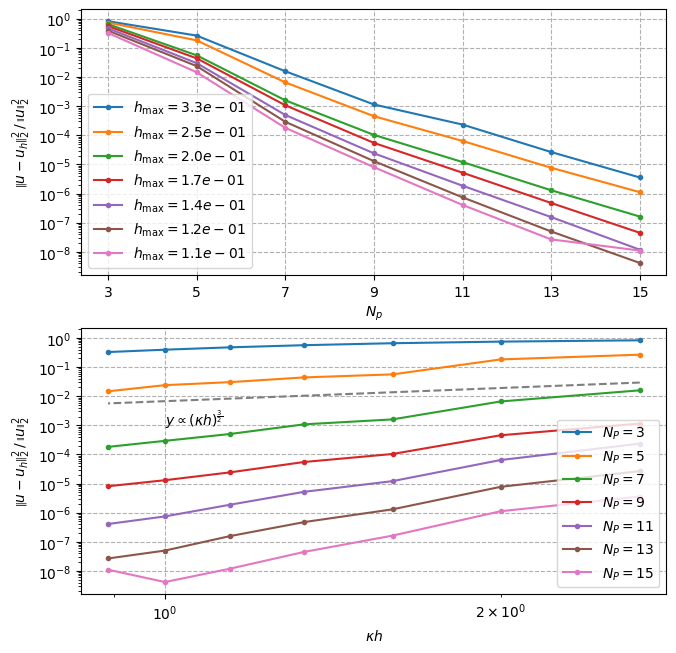

In [35]:
plot_hp_convergence(errors=errors, hs=hs, N_ths=N_ths, kappa_e=kappa_e, N_modes=N_modes, H=H)
plt.loglog(kappa_e*hs, np.e**(-5)*(kappa_e*hs)**(1.5),'--')
plt.text(x=1., y=0.001, s=r'$y\propto(\kappa h)^{\frac{3}{2}}$')
plt.savefig('with_1.5_line.pdf')


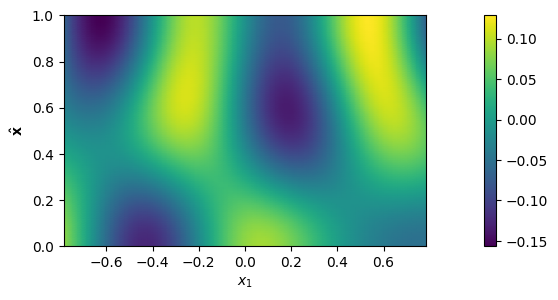

In [24]:
Domain.plot_field(X,Y, np.real(u_Trefft))